# Analysis of the Duration of Music by Genre 

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the tracks dataset
t = pd.read_csv("tracks.csv")
t.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
# Importing the artists dataset
a = pd.read_csv("artists.csv")
a.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [4]:
# Selecting and reformatting relevant columns of tracks dataframe
t = t[['name','duration_ms','id_artists','popularity']]
t['id_artists'] = t['id_artists'].apply(lambda x: x.replace("['",'').replace("']",'')) 

In [5]:
# Selecting and renaming relevant columns of artists dataframe
a = a[['id','name','genres']]
a = a.rename(columns={"id": "id_artists", "name": "artist_name"})

In [6]:
# Reformatting the genres column so it is easier to work with
a['genres'] = a['genres'].str.split(',').str[0].apply(lambda x: x.replace("[",'').replace("]",'').replace("'",'').replace('"',''))
a = a[a['genres'] != '']

In [7]:
# Combining the tracks and artists dataframes
df = t.merge(a, on='id_artists', how='inner')

In [8]:
# Selecting only the top 20 most popular genres
plot_df = df[df['genres'].isin(df.groupby('genres')['popularity'].mean().sort_values()[-20:].index)].reset_index()

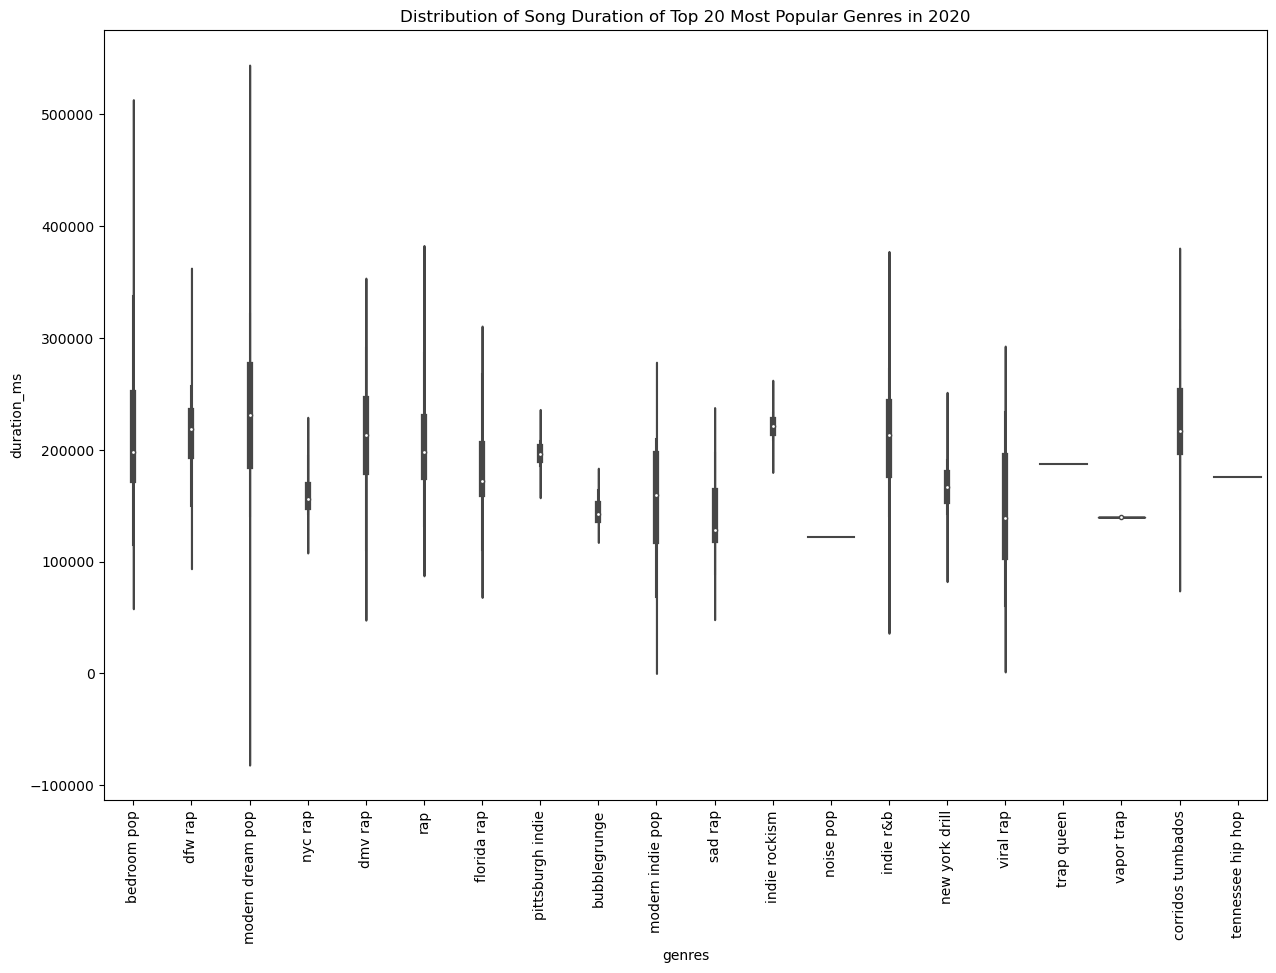

In [9]:
# Plotting the data on violin plot
plt.figure(figsize=(15,10))
sns.violinplot(x="genres", y="duration_ms", data=plot_df)
plt.xticks(rotation=90)
plt.title("Distribution of Song Duration of Top 20 Most Popular Genres in 2020")
plt.show()

In [10]:
# Filtering out genres with less than 100 songs
genre_counts = df['genres'].value_counts()
genres_to_keep = genre_counts[genre_counts >= 100].index
df = df[df['genres'].isin(genres_to_keep)]

In [11]:
# Selecting only the top 10 most popular genres and reformatting columns to make them more intuitive 
plot_df = df[df['genres'].isin(df.groupby('genres')['popularity'].mean().sort_values()[-10:].index)].reset_index()
plot_df.duration_ms = (df.duration_ms / 1000)
plot_df = plot_df.rename(columns={"genres": "Genre", "duration_ms": "Duration (s)"})

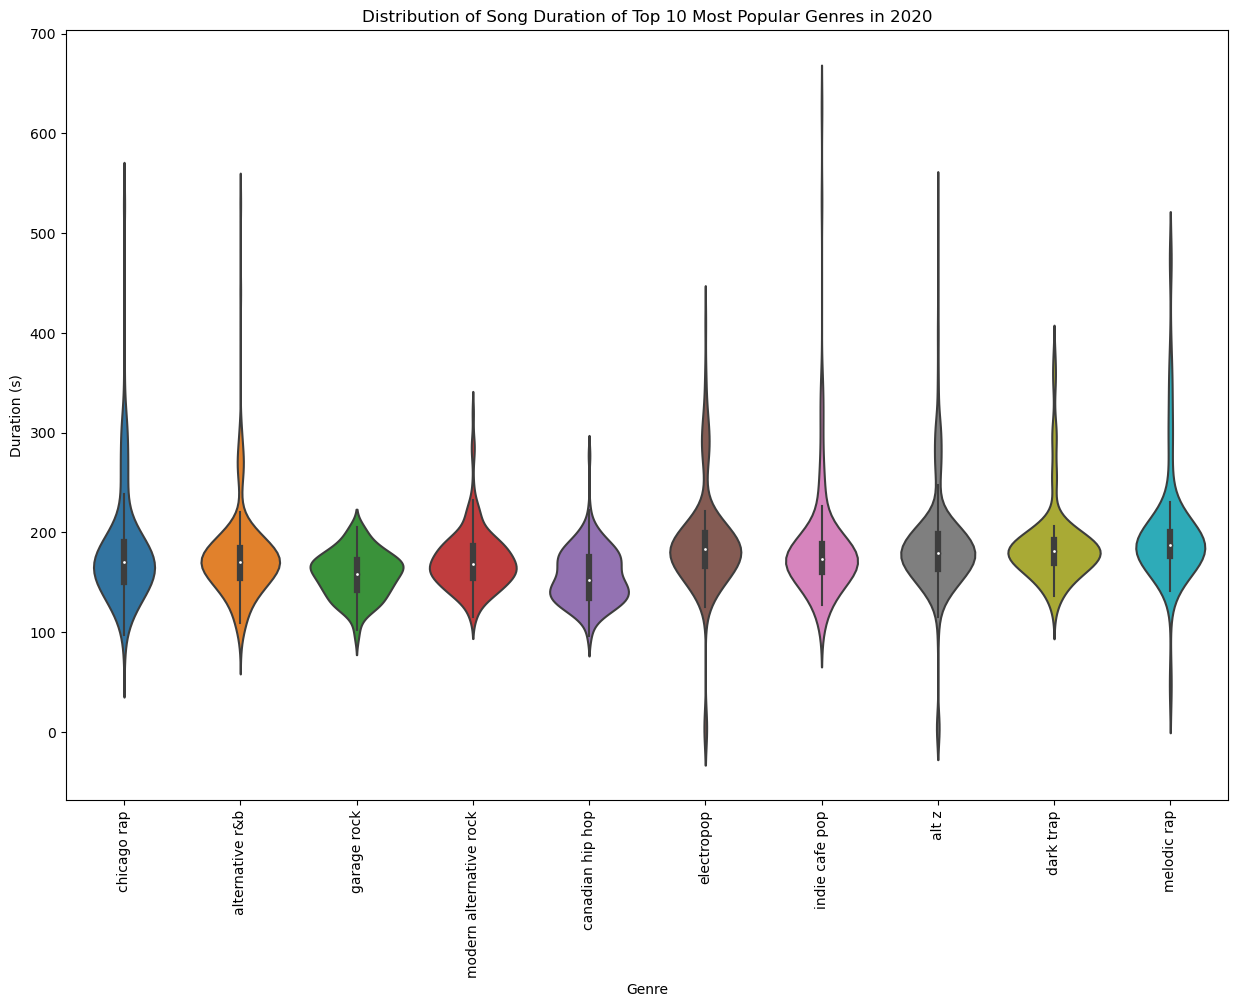

In [12]:
# Plotting the data on violin plot
plt.figure(figsize=(15,10))
sns.violinplot(x="Genre", y="Duration (s)", data=plot_df)
plt.xticks(rotation=90)
plt.title("Distribution of Song Duration of Top 10 Most Popular Genres in 2020")
plt.show()

In [13]:
# Creating a function to remove the outliers
def remove_outliers(df):
    Q1 = df.groupby('Genre')['Duration (s)'].quantile(0.25)
    Q3 = df.groupby('Genre')['Duration (s)'].quantile(0.75)
    IQR = Q3 - Q1
    
    filter_outliers = ~(
        (df['Genre'].map(Q1) - 1.5 * df['Genre'].map(IQR) > df['Duration (s)']) |
        (df['Genre'].map(Q3) + 1.5 * df['Genre'].map(IQR) < df['Duration (s)']))
    
    return df[filter_outliers]

filtered_df = remove_outliers(plot_df)

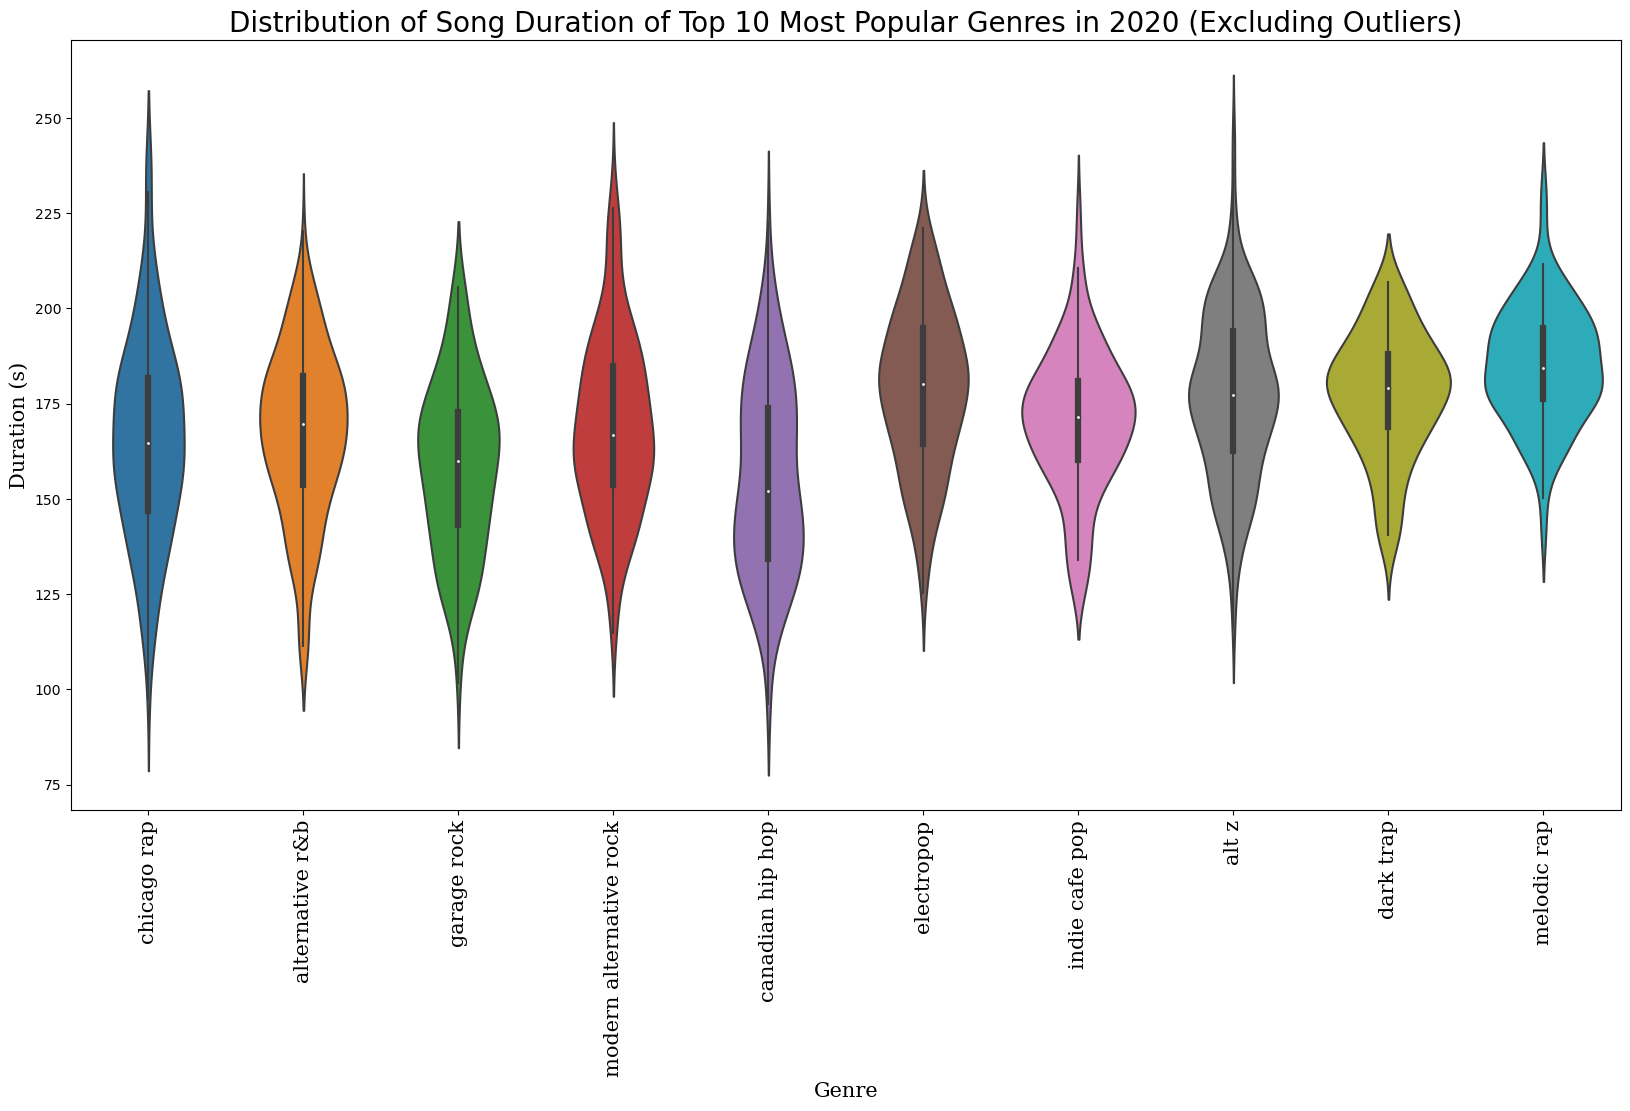

In [14]:
# Improving the visual appearance of the labels and with outliers removed
font_properties = {
    'size': 15,
    'family': 'serif',
    'weight': 'normal'
}


plt.figure(figsize=(20,10))
sns.violinplot(x="Genre", y="Duration (s)", data=filtered_df)
plt.xticks(rotation=90)
plt.xlabel("Genre", **font_properties)
plt.ylabel("Duration (s)", **font_properties)


for label in plt.gca().get_xticklabels():
    label.set_fontsize(font_properties['size'])
    label.set_family(font_properties['family'])
    label.set_weight(font_properties['weight'])

plt.title("Distribution of Song Duration of Top 10 Most Popular Genres in 2020 (Excluding Outliers)", fontsize=20)
plt.show()